# Can the success of a non-English language film predict its ROI?


## We begin by importing our libraries and necessary data.

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns
%matplotlib inline 

In [3]:
budget_aka_df = pd.read_csv('zippedData/budget_to_aka.csv')

In [4]:
budget_aka_df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profitability,worldwide_ROI,domestic_profitability,...,ar,pt,ur,bg,cmn,ca,fr,sv,fa,bn
0,0,0.0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,335507625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-307237650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
budget_aka_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 37 columns):
id                         1541 non-null float64
release_date               1541 non-null object
movie                      1541 non-null object
production_budget          1541 non-null int64
domestic_gross             1541 non-null int64
worldwide_gross            1541 non-null int64
worldwide_profitability    1541 non-null int64
worldwide_ROI              1541 non-null float64
domestic_profitability     1541 non-null int64
domestic_ROI               1541 non-null float64
title_id                   1541 non-null object
ordering                   1541 non-null int64
region                     1541 non-null object
language                   1541 non-null object
he                         1541 non-null float64
kn                         1541 non-null float64
es                         1541 non-null float64
ta                         1541 non-null float64
qbn                        1

### Let's drop the unnecessary column that arrived when we imported the CSV

In [5]:
budget_aka_df.drop(columns=['Unnamed: 0'], inplace=True)

## During the data cleaning process we combined our two tables for analysis.

These two tables are imdb_title_aka_df and tmdb_budgets_df. imdb_title_aka_df shows, among other things, the region and language of the films in the table. tmdb_budgets_df shows the budgets. 

It is also worth noting that our languages column has been split such that each individual language has its own column and will be measured against its corresponding ROI.

# Time to plot our data and look at the non-English language films!

## Before we create our boxplots we must create our dictionary of languages to ROIs

Below we create a list of the columns from our dataframe in order to separate out each language from one another. Afterwards, we create a dictionary called lang_count to get the count of films for each language where we add 1 for each instance that a language exists for a particular film. Our new list sorts the counts. The sort is initially alphabetically but we wrote a lambda function to sort the languages in numerical order ascending. From this, we will analyze only the languages whose count is greater than 100 and is not English. This will amount to languages whose market share is between 4 and 20%. 

Note: The English language has 40% of the market share according to this dataframe. 

In [9]:
cols = list(budget_aka_df.columns)

In [10]:
budget_aka_df_cols = cols[14:]

In [12]:
budget_aka_df_cols

['he',
 'kn',
 'es',
 'ta',
 'qbn',
 'hi',
 'tr',
 'te',
 'de',
 'hr',
 'nl',
 'en',
 'it',
 'ar',
 'pt',
 'ur',
 'bg',
 'cmn',
 'ca',
 'fr',
 'sv',
 'fa',
 'bn']

In [16]:
lang_count = {}
for col in budget_aka_df_cols:
    count = np.sum(budget_aka_df[col] == 1).sum() 
    lang_count[col] = count

In [17]:
lang_count

{'he': 425,
 'kn': 1,
 'es': 8,
 'ta': 2,
 'qbn': 1,
 'hi': 17,
 'tr': 365,
 'te': 14,
 'de': 30,
 'hr': 9,
 'nl': 1,
 'en': 1113,
 'it': 14,
 'ar': 1,
 'pt': 6,
 'ur': 6,
 'bg': 9,
 'cmn': 7,
 'ca': 4,
 'fr': 545,
 'sv': 114,
 'fa': 8,
 'bn': 6}

In [18]:
new_list=sorted(lang_count.items())
new_list

[('ar', 1),
 ('bg', 9),
 ('bn', 6),
 ('ca', 4),
 ('cmn', 7),
 ('de', 30),
 ('en', 1113),
 ('es', 8),
 ('fa', 8),
 ('fr', 545),
 ('he', 425),
 ('hi', 17),
 ('hr', 9),
 ('it', 14),
 ('kn', 1),
 ('nl', 1),
 ('pt', 6),
 ('qbn', 1),
 ('sv', 114),
 ('ta', 2),
 ('te', 14),
 ('tr', 365),
 ('ur', 6)]

In [19]:
{k: v for k, v in sorted(lang_count.items(), key=lambda item: item[1])}

{'kn': 1,
 'qbn': 1,
 'nl': 1,
 'ar': 1,
 'ta': 2,
 'ca': 4,
 'pt': 6,
 'ur': 6,
 'bn': 6,
 'cmn': 7,
 'es': 8,
 'fa': 8,
 'hr': 9,
 'bg': 9,
 'te': 14,
 'it': 14,
 'hi': 17,
 'de': 30,
 'sv': 114,
 'tr': 365,
 'he': 425,
 'fr': 545,
 'en': 1113}

## Now, we plot!

One final move we make before we create our boxplot is to create a list of languages that we want to analyze (the aforementioned languages whose prevalence is more than 100 and is not English). From this list we create a dictionary that will have a language as its key which will match to its corresponding ROI value using a for loop that will iterate through the rows of our dataframe and add a 1 to the key for each time the language is present and append the ROI for the corresponding language.

In [21]:
languages = ["en", "fr", "he", "tr", "sv", "bg"]
dic = {}
dic["language"] = []
dic["roi"] = []
for index, row in budget_aka_df.iterrows():
    for i in languages:
        if row[i] == 1:
            dic["language"].append(i)
            dic["roi"].append(row['worldwide_ROI'])

In [22]:
df1 = pd.DataFrame(dic)
print(df1)

     language          roi
0          en   553.257713
1          en   154.667286
2          en   -57.210757
3          en   582.711400
4          en   582.711400
...       ...          ...
2566       en   -98.176000
2567       en   730.307895
2568       en  2669.782000
2569       en   680.172000
2570       en  5236.991304

[2571 rows x 2 columns]


## Smells like success?

Here we can see that there are four languages that match our aforementioned requirements. We organized our languages in descending order based on ROI. All four non-English languages that we chose have a median ROI of well over 100 with two returning around 200 as their median. The languages, from left to right, are Hebrew, Turkish, French, and Swedish.

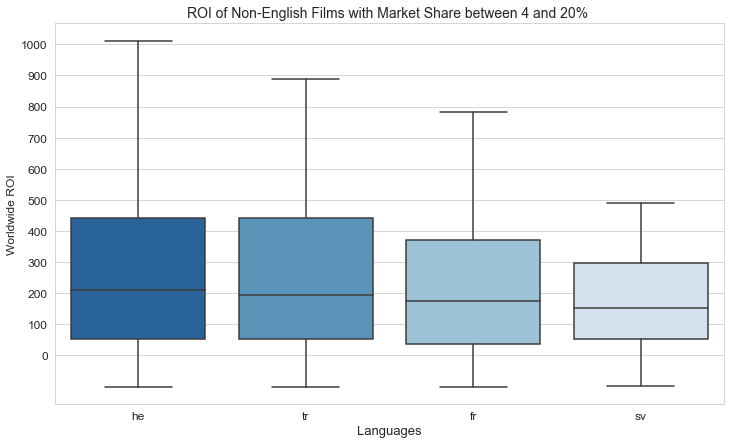

In [23]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')

b=box_plot=sns.boxplot(data=df1, x='language', y='roi', showfliers=False,  
                       order=['he', 'tr', 'fr','sv'], 
                       palette="Blues_r")
b.axes.set_title("ROI of Non-English Films with Market Share between 4 and 20%",
                 fontsize=14)
b.set_xlabel("Languages",fontsize=13)
b.set_ylabel("Worldwide ROI",fontsize=12)
b.tick_params(labelsize=12)
yticks = np.linspace(start=0, stop=100*10, num=11)
plt.yticks(yticks)
plt.show()

# Key Findings and Further Research Suggestions

According to the above information, it can be surmised that Microsoft should, perhaps, look into Turkish and Hebrew as languages to both film in and translate its English-speaking films into. With recent Netflix successes in Hebrew-speaking shows like Fauda and Shtisel and Turkish shows such as Rise of Empires: Ottoman it seems like this could be a very successful venture for Microsoft to enter as well!

A future question that we believe is worth looking into is regarding the country of origin of the film. It would be interesting to see if this is a factor in its success when we analyze its language alongside of it. 

Best of luck in your ventures, Microsoft!